In [1]:
#Creating the Model Using Custom Data Set.
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
import time

# Training data generator
train_datagen = ImageDataGenerator(rescale=1/255)

# Testing data generator
test_datagen = ImageDataGenerator(rescale=1/255)

# Define paths to training and testing datasets
train_data_path = 'C:\\Users\\sushu\\OneDrive\\Desktop\\OTHER COURSES\\Intern\\CodeAlpha\\Machine Learning\\Image reconization\\dataset\\data\\training\\'

test_data_path = 'C:\\Users\\sushu\\OneDrive\\Desktop\\OTHER COURSES\\Intern\\CodeAlpha\\Machine Learning\\Image reconization\\dataset\\data\\testing\\'

# Load training and testing datasets
train_dataset = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical'
)

test_dataset = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical'
)

# Print class indices for training and testing datasets
train_class_indices = train_dataset.class_indices
test_class_indices = test_dataset.class_indices
print("Training class indices:", train_class_indices)
print("Testing class indices:", test_class_indices)

# Define the CNN model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(200, 200, 3)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

# Train the model
model_fit = model.fit(
    train_dataset,
    steps_per_epoch=len(train_dataset),
    epochs=10,
    validation_data=test_dataset,
    validation_steps=len(test_dataset)
)

# Save the trained model
model.save("Navaneeth_image_recognizaton.h5")


Found 6899 images belonging to 8 classes.
Found 6899 images belonging to 8 classes.
Training class indices: {'airplane': 0, 'car': 1, 'cat': 2, 'dog': 3, 'flower': 4, 'fruit': 5, 'motorbike': 6, 'person': 7}
Testing class indices: {'airplane': 0, 'car': 1, 'cat': 2, 'dog': 3, 'flower': 4, 'fruit': 5, 'motorbike': 6, 'person': 7}
Epoch 1/10


C:\Users\sushu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


216/216 ━━━━━━━━━━━━━━━━━━━━ 248s 1s/step - accuracy: 0.5358 - loss: 1.6888 - val_accuracy: 0.8656 - val_loss: 0.3081
Epoch 2/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/10


C:\Users\sushu\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


216/216 ━━━━━━━━━━━━━━━━━━━━ 178s 822ms/step - accuracy: 0.8908 - loss: 0.3154 - val_accuracy: 0.9046 - val_loss: 0.2371
Epoch 4/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 187s 865ms/step - accuracy: 0.9384 - loss: 0.1663 - val_accuracy: 0.9761 - val_loss: 0.0677
Epoch 6/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 189s 802ms/step - accuracy: 0.9687 - loss: 0.0843 - val_accuracy: 0.9417 - val_loss: 0.1383
Epoch 8/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 205s 947ms/step - accuracy: 0.9799 - loss: 0.0722 - val_accuracy: 0.9897 - val_loss: 0.0310
Epoch 10/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 2

In [18]:
#using a static data for testing the model

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
import time
class_indices = {
    0: 'airplane',
    1: 'car',
    2: 'cat',
    3: 'dog',
    4: 'flower',
    5: 'fruit',
    6: 'motorbike',
    7: 'person'
}
def classify_image(image_path, model):
    img = image.load_img(image_path, target_size=(200, 200))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_indices[predicted_class_index]
    
    return predicted_class
'''image_path = "C:\\Users\\sushu\\OneDrive\\Desktop\\OTHER COURSES\\Intern\\CodeAlpha\\Machine Learning\\Image reconization\\dataset\\data\\training\\airplane\\airplane_0012.jpg"
#capture_and_save_image(image_path)
loaded_model = tf.keras.models.load_model("Navaneeth_image_recognizaton.h5")

# Recompile the loaded model
loaded_model.compile(loss='categorical_crossentropy',
                     optimizer=RMSprop(learning_rate=0.001),
                     metrics=['accuracy'])
'''
# Define the directory containing the images
folder_path = "C:\\Users\\sushu\\OneDrive\\Desktop\\OTHER COURSES\\Intern\\CodeAlpha\\Machine Learning\\Image reconization\\dataset\\test\\"

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Iterate over each image file and classify
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    predicted_class = classify_image(image_path, loaded_model)
    print("Image:", image_file, "Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Image: airplane_0000.jpg Predicted class: airplane
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Image: airplane_0008.jpg Predicted class: airplane
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Image: airplane_0011.jpg Predicted class: airplane
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image: airplane_0012.jpg Predicted class: airplane
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image: airplane_0014.jpg Predicted class: airplane
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Image: airplane_0015.jpg Predicted class: airplane
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Image: airplane_0016.jpg Predicted class: airplane
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image: airplane_0017.jpg Predicted class: airplane
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Image: airplane_0018.jpg Predicted class: airplane
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Image: airplane_0019.jpg Predicted class: airplane
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Image: airplane_0021.jpg Predicted class: airplane
1/1 ━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Predicted class: person


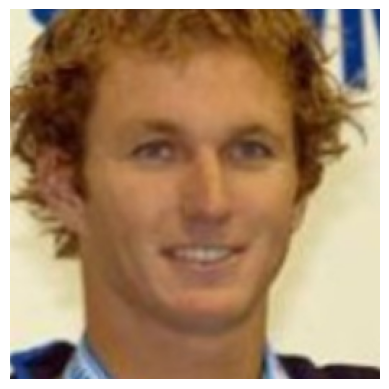

In [27]:
#giving a single image from manual testing
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
class_indices = {
    0: 'airplane',
    1: 'car',
    2: 'cat',
    3: 'dog',
    4: 'flower',
    5: 'fruit',
    6: 'motorbike',
    7: 'person'
}
# Function to classify an image
def classify_image(image_path, model):
    try:
        img = image.load_img(image_path, target_size=(200, 200))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0

        predictions = model.predict(img_array)
        predicted_class_index = np.argmax(predictions)
        predicted_class = class_indices[predicted_class_index]

        return predicted_class
    except Exception as e:
        print(f"Error processing image: {e}")
        return None

# Load the pre-trained model
loaded_model = tf.keras.models.load_model("Navaneeth_image_recognizaton.h5")

# Recompile the loaded model if needed

# Path to the specific image
image_path = r"C:\Users\sushu\OneDrive\Desktop\OTHER COURSES\Intern\CodeAlpha\Machine Learning\Image reconization\dataset\manualtest\n.jpg"


# Classify the image
predicted_class = classify_image(image_path, loaded_model)
if predicted_class is not None:
    print("Predicted class:", predicted_class)
else:
    print("Failed to classify the image.")
#using Matplot to verify the image.
image = plt.imread(image_path)
# Display the image
plt.imshow(image)
plt.axis('off') 
plt.show()


In [7]:
#using Web Cam to classify the images

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
import time
# Define class indices
class_indices = {
    0: 'airplane',
    1: 'car',
    2: 'cat',
    3: 'dog',
    4: 'flower',
    5: 'fruit',
    6: 'motorbike',
    7: 'person'
}

# Function to classify an image
def classify_image(image_path, model):
    img = image.load_img(image_path, target_size=(200, 200))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_indices[predicted_class_index]
    
    return predicted_class

# Load the pre-trained model
loaded_model = tf.keras.models.load_model("Navaneeth_image_recognizaton.h5")

# Recompile the loaded model if needed
loaded_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                     metrics=['accuracy'])

def capture_and_save_image(save_path):
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error: Unable to open webcam")
        return None
    ret, frame = cap.read()
    if not ret:
        print("Error: Unable to capture frame")
        cap.release()  # Release the camera capture object
        return None
    
    # Extract the directory path and image name from the provided save_path
    directory_path, image_name = os.path.split(save_path)
    
    # Ensure that the directory path exists
    os.makedirs(directory_path, exist_ok=True)
    
    # Save the captured image with the specified name
    cv2.imwrite(os.path.join(directory_path, image_name), frame)
    
    cap.release()  # Release the camera capture object
    #print("Image saved successfully at:", save_path)
    time.sleep(1)  # Add a delay of 1 second
    
    return save_path

save_path = "C:\\Users\\sushu\\OneDrive\\Desktop\\OTHER COURSES\\Intern\\CodeAlpha\\Machine Learning\\Image reconization\\dataset\\data\\captured\\my_captured_image.jpg"

image_path = capture_and_save_image(save_path)
# Classify the specified image
predicted_class = classify_image(image_path, loaded_model)
print("Image:", image_path, "Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Image: C:\Users\sushu\OneDrive\Desktop\OTHER COURSES\Intern\CodeAlpha\Machine Learning\Image reconization\dataset\data\captured\my_captured_image.jpg Predicted class: cat
